In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Importing necessary libraries

Setting up system path to gain access to models folder to access trained models and class names

In [59]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sys.path = list(set(sys.path))
print("Cleaned Python Path:", sys.path)

# Adding the 'models' directory to the Python path
sys.path.append('/content/drive/MyDrive/Product_Recognition_Categorisation/Models')

# Load model functions from load_models.py
from allModels import load_main_category_model_scratch, load_fruits_subcategory_model_scratch, load_vegetables_subcategory_model_scratch, load_packages_subcategory_model_scratch

# Load class names from all_class_names.py file
from all_class_labels import fruits_classes, vegetables_classes, packages_classes

Cleaned Python Path: ['', '/usr/lib/python3.10', '/content', '/usr/lib/python310.zip', '/usr/lib/python3.10/lib-dynload', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/content/drive/MyDrive/Product_Recognition_Categorisation/Models', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages', '/env/python', '/root/.ipython']


Loading all pre-trained models

In [4]:
main_category_model = load_main_category_model_scratch()
fruits_subcategory_model = load_fruits_subcategory_model_scratch()
vegetables_subcategory_model = load_vegetables_subcategory_model_scratch()
packages_subcategory_model = load_packages_subcategory_model_scratch()

Function to predict the given image path its category and sub category

In [5]:
def predict_image(image_path):

    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, axis=0)

    main_category_prediction = main_category_model.predict(image)
    main_categories = ['Fruits', 'Packages', 'Vegetables']
    predicted_main_category = main_categories[tf.argmax(main_category_prediction[0])]

    print(f"Predicted main category: {predicted_main_category}")

    if predicted_main_category == 'Fruits':
        subcategory_model = fruits_subcategory_model
        subcategory_classes = fruits_classes
    elif predicted_main_category == 'Vegetables':
        subcategory_model = vegetables_subcategory_model
        subcategory_classes = vegetables_classes
    else:
        subcategory_model = packages_subcategory_model
        subcategory_classes = packages_classes

    subcategory_prediction = subcategory_model.predict(image)
    predicted_subcategory_index = tf.argmax(subcategory_prediction[0])
    predicted_subcategory = subcategory_classes[predicted_subcategory_index]

    print(f"Predicted subcategory: {predicted_subcategory}")

    return predicted_main_category, predicted_subcategory


In [16]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Fruits/apple/Image_1.jpg'

main_category, subcategory = predict_image(image_path)
print(f"Final Prediction: {main_category} -> {subcategory}")

1/1 [==============================] - 0s 26ms/step
Predicted main category: Fruits
1/1 [==============================] - 0s 25ms/step
Predicted subcategory: apple
Final Prediction: Fruits -> apple


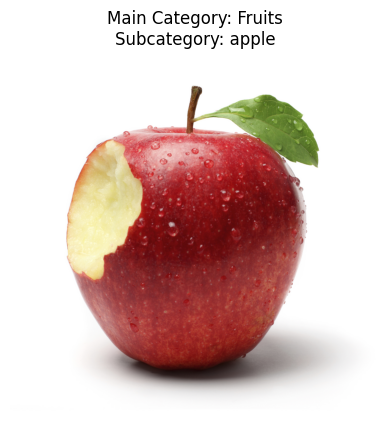

In [17]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {main_category}\nSubcategory: {subcategory}')
plt.axis('off')
plt.show()

In [51]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Fruits/pear/Image_4.jpg'

main_category, subcategory = predict_image(image_path)
print(f"Final Prediction: {main_category} -> {subcategory}")

1/1 [==============================] - 0s 72ms/step
Predicted main category: Fruits
1/1 [==============================] - 0s 67ms/step
Predicted subcategory: pear
Final Prediction: Fruits -> pear


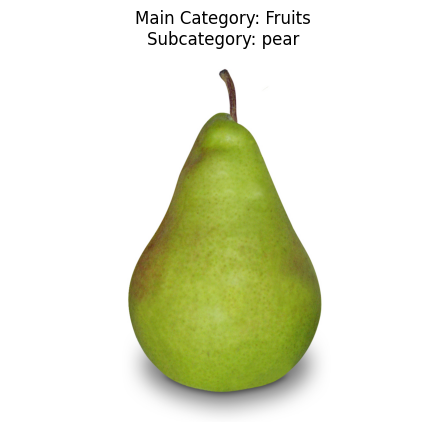

In [52]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {main_category}\nSubcategory: {subcategory}')
plt.axis('off')
plt.show()

In [56]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Vegetables/cauliflower/Image_7.jpg'

main_category, subcategory = predict_image(image_path)
print(f"Final Prediction: {main_category} -> {subcategory}")

1/1 [==============================] - 0s 26ms/step
Predicted main category: Vegetables
1/1 [==============================] - 0s 24ms/step
Predicted subcategory: cauliflower
Final Prediction: Vegetables -> cauliflower


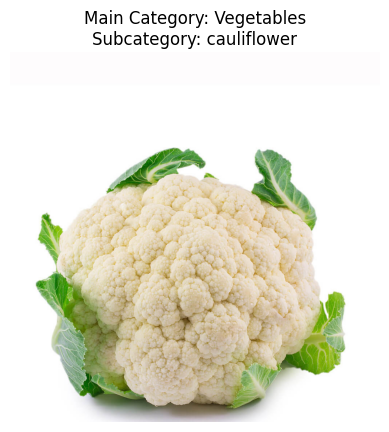

In [57]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {main_category}\nSubcategory: {subcategory}')
plt.axis('off')
plt.show()

In [53]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Vegetables/soy beans/Image_9.jpg'

main_category, subcategory = predict_image(image_path)
print(f"Final Prediction: {main_category} -> {subcategory}")

1/1 [==============================] - 0s 27ms/step
Predicted main category: Vegetables
1/1 [==============================] - 0s 70ms/step
Predicted subcategory: soy beans
Final Prediction: Vegetables -> soy beans


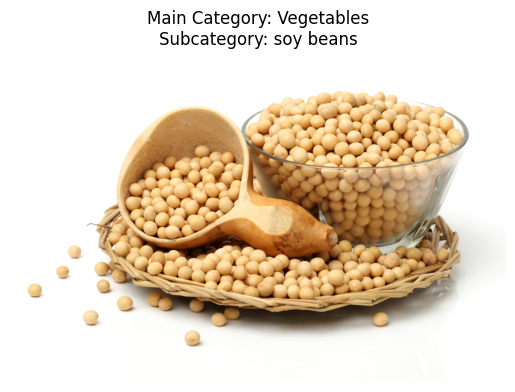

In [54]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {main_category}\nSubcategory: {subcategory}')
plt.axis('off')
plt.show()

In [22]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Packages/Oatly-Oat-Milk/Oatly-Oat-Milk_006.jpg'

main_category, subcategory = predict_image(image_path)
print(f"Final Prediction: {main_category} -> {subcategory}")

1/1 [==============================] - 0s 26ms/step
Predicted main category: Vegetables
1/1 [==============================] - 0s 26ms/step
Predicted subcategory: garlic
Final Prediction: Vegetables -> garlic


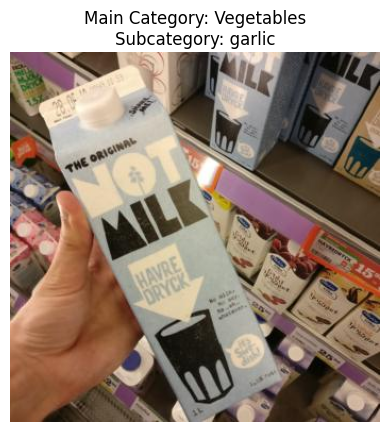

In [23]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {main_category}\nSubcategory: {subcategory}')
plt.axis('off')
plt.show()

In [24]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Packages/Bravo-Apple-Juice/Bravo-Apple-Juice_006.jpg'

main_category, subcategory = predict_image(image_path)
print(f"Final Prediction: {main_category} -> {subcategory}")

1/1 [==============================] - 0s 26ms/step
Predicted main category: Packages
1/1 [==============================] - 0s 66ms/step
Predicted subcategory: Bravo-Apple-Juice
Final Prediction: Packages -> Bravo-Apple-Juice


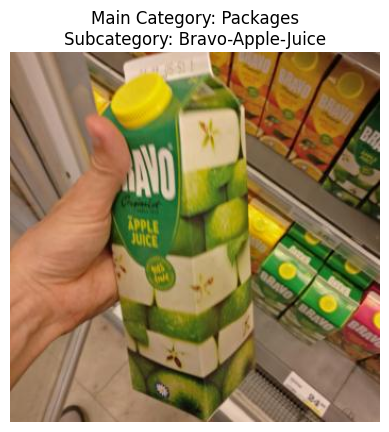

In [25]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {main_category}\nSubcategory: {subcategory}')
plt.axis('off')
plt.show()

In [26]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Packages/Yoggi-Vanilla-Yoghurt/Yoggi-Vanilla-Yoghurt_004.jpg'

main_category, subcategory = predict_image(image_path)
print(f"Final Prediction: {main_category} -> {subcategory}")

1/1 [==============================] - 0s 26ms/step
Predicted main category: Vegetables
1/1 [==============================] - 0s 25ms/step
Predicted subcategory: chilli pepper
Final Prediction: Vegetables -> chilli pepper


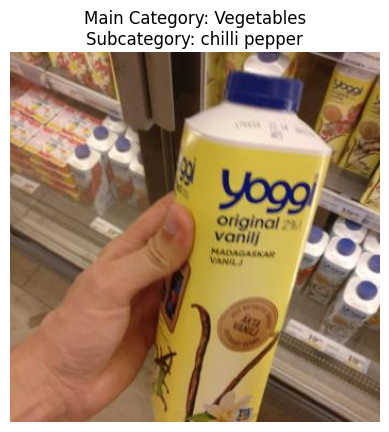

In [27]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Main Category: {main_category}\nSubcategory: {subcategory}')
plt.axis('off')
plt.show()

In [62]:
image_path = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test/Fruits/grapes/Image_1.jpg'

main_category, subcategory = predict_image(image_path)
print(f"Final Prediction: {main_category} -> {subcategory}")

1/1 [==============================] - 0s 27ms/step
Predicted main category: Fruits
1/1 [==============================] - 0s 25ms/step
Predicted subcategory: grapes
Final Prediction: Fruits -> grapes


In [41]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report


In [47]:
image_size = (64, 64)
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of images for evaluation
)

Found 644 images belonging to 3 classes.


In [48]:
model = load_model('/content/drive/MyDrive/Product_Recognition_Categorisation/Models/main_category_model.h5')

In [68]:
y_true = test_generator.classes
y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

y_pred_classes = np.argmax(y_pred, axis=1)

21/21 [==============================] - 13s 602ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [75]:
y_true = test_generator.classes
y_pred = main_category_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
# Convert the predictions from one-hot encoded to label indices
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the true labels from one-hot encoded to label indices
# y_true_labels = np.argmax(y_true, axis=1)

# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)
# y_true_classes = np.argmax(y_true, axis=1)

21/21 [==============================] - 13s 606ms/step
[[0.08345307 0.00452358 0.9120233 ]
 [0.08345307 0.00452358 0.9120233 ]
 [0.22216491 0.0176493  0.7601857 ]
 ...
 [0.07497983 0.00344277 0.92157733]
 [0.08507536 0.00393252 0.91099215]
 [0.0847718  0.00847348 0.9067547 ]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [73]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report
target_names = list(test_generator.class_indices.keys())
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=target_names))

Confusion Matrix:
 [[  0   0  99]
 [  0   0 285]
 [  0   0 260]]

Classification Report:
               precision    recall  f1-score   support

      Fruits       0.00      0.00      0.00        99
    Packages       0.00      0.00      0.00       285
  Vegetables       0.40      1.00      0.58       260

    accuracy                           0.40       644
   macro avg       0.13      0.33      0.19       644
weighted avg       0.16      0.40      0.23       644



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

train_dir = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/train'
validation_dir = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/validation'
batch_size = 32
image_size = (64, 64)

def load_dataset(directory, batch_size, image_size, shuffle=True):
    return tf.keras.utils.image_dataset_from_directory(
        directory,
        labels="inferred",
        label_mode="categorical",
        color_mode="rgb",
        batch_size=batch_size,
        image_size=image_size,
        shuffle=shuffle
    )

# Validation dataset
validation_main_category_dataset = load_dataset(validation_dir, batch_size, image_size)
class_names = validation_main_category_dataset.class_names

# Load the saved model
main_category_model = tf.keras.models.load_model('/content/drive/MyDrive/Product_Recognition_Categorisation/Models/main_category_model.h5')

# Get the true labels and predictions for the validation dataset
y_true = []
y_pred = []

for images, labels in validation_main_category_dataset:
    predictions = main_category_model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)



Found 404 files belonging to 3 classes.
1/1 [==============================] - 0s 73ms/step


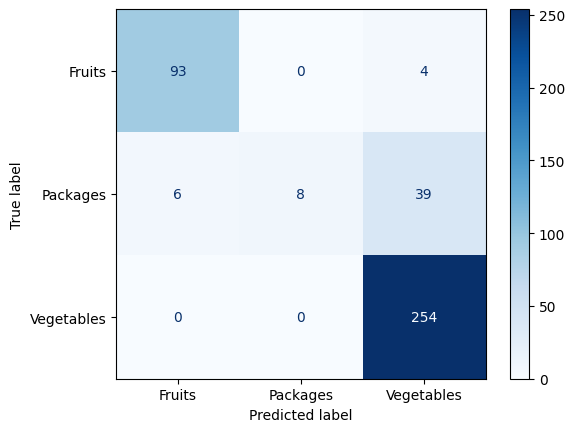

              precision    recall  f1-score   support

      Fruits       0.94      0.96      0.95        97
    Packages       1.00      0.15      0.26        53
  Vegetables       0.86      1.00      0.92       254

    accuracy                           0.88       404
   macro avg       0.93      0.70      0.71       404
weighted avg       0.89      0.88      0.84       404



In [83]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)
